In [1]:
import pandas as pd 
import numpy as np
import scipy
from scipy import stats
from scipy.stats import percentileofscore

In [2]:
df = pd.read_csv('student_marks.csv')
df.head()

,Unnamed: 0,Gender,DOB,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
0,John,M,05-04-1988,55,45,56,87,21,52,89,65
1,Suresh,M,04-05-1987,75,96,78,64,90,61,58,2
2,Ramesh,M,25-05-1989,25,54,89,76,95,87,56,74
3,Jessica,F,12-08-1990,78,96,86,63,54,89,75,45
4,Jennifer,F,02-09-1989,58,96,78,46,96,77,83,53


In [3]:
df['Maths'].mean()

59.6

In [4]:
df['English'].mean()

69.7

In [5]:
# Correlation 
df1 =df.iloc[:,3:-1]
df1

,Maths,Physics,Chemistry,English,Biology,Economics,History
0,55,45,56,87,21,52,89
1,75,96,78,64,90,61,58
2,25,54,89,76,95,87,56
3,78,96,86,63,54,89,75
4,58,96,78,46,96,77,83
5,45,87,52,89,55,89,87
6,55,64,61,58,75,58,64
7,54,76,87,56,25,56,76
8,55,63,89,75,78,75,63
9,96,46,77,83,58,83,46


In [6]:
##Correlation 

dfc =df1.corr()
dfc

,Maths,Physics,Chemistry,English,Biology,Economics,History
Maths,1.000000,0.113354,0.076751,-0.064074,-0.146598,0.000312,-0.320846
Physics,0.113354,1.000000,0.117192,-0.562608,0.279638,0.191851,0.334082
Chemistry,0.076751,0.117192,1.000000,-0.409680,0.318032,0.235390,-0.482710
English,-0.064074,-0.562608,-0.409680,1.000000,-0.330844,0.237577,-0.038775
Biology,-0.146598,0.279638,0.318032,-0.330844,1.000000,0.370531,-0.456131
Economics,0.000312,0.191851,0.235390,0.237577,0.370531,1.000000,-0.164953
History,-0.320846,0.334082,-0.482710,-0.038775,-0.456131,-0.164953,1.000000


In [7]:
import seaborn as sms
sms.heatmap(dfc)

# Categorical varialbe of independence ---Chi Square test

In [8]:
import numpy as np
import pandas as pd
import scipy.stats as stats
ds =pd.read_csv('role_website.csv')

In [9]:
ds.head()

,role,website
0,teacher,linkedin
1,teacher,linkedin
2,student,facebook
3,student,facebook
4,teacher,linkedin


In [10]:
ds.describe()

,role,website
count,34,34
unique,2,2
top,teacher,linkedin
freq,21,18


In [11]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 2 columns):
role       34 non-null object
website    34 non-null object
dtypes: object(2)
memory usage: 624.0+ bytes


In [12]:
ds.dtypes

role       object
website    object
dtype: object

In [13]:
#create contingency tabel

df_crosstab = pd.crosstab(ds['role'],ds['website'],margins =True)
print(df_crosstab)

website  facebook  linkedin  All
role                            
student        10         3   13
teacher         6        15   21
All            16        18   34


In [14]:
df_crosstab.columns=['facebook','linkedin','row_totals']# changing the coumns name 
df_crosstab.index=['student','teacher','col_totals']# changing the c index names 
df_crosstab

,facebook,linkedin,row_totals
student,10,3,13
teacher,6,15,21
col_totals,16,18,34


In [15]:
#Get the observed table

observed =df_crosstab.iloc[0:2,0:2]
observed 

,facebook,linkedin
student,10,3
teacher,6,15


In [16]:
#st.chi2_contingency?

In [17]:
#"Mathodology 2 : Calculate chi square using scipy.stat library"
chi2,p,dof, expected =stats.chi2_contingency(observed = observed)
# the returned data includes: chi_squaredd_stat, P_value,df, expacted crosstab
#print("stresult ='stresult')

print('Chi Square test=',chi2)
print("P-value", p)
print("dof=", dof)
print("expected=", expected)

"""Form this interpret the p value is 0.016 that is less then 0.05 --> significant valye
Hence null hypothesis is rejected  and shows the two variables are dependent of each other 
"""

Chi Square test= 5.718991656491658
P-value 0.01678236577734386
dof= 1
expected= [[ 6.11764706  6.88235294]
 [ 9.88235294 11.11764706]]


'Form this interpret the p value is 0.016 that is less then 0.05 --> significant valye\nHence null hypothesis is rejected  and shows the two variables are dependent of each other \n'

In [19]:
#significance value

alpha= 0.05

#determine whether to reject or keep your null hypothesis
print("Signficance lelvel alpha"%(alpha p))

if p>= alpha:
    print("Variable are not associated and independent (accep H0)'"
     " )
          
    
    


SyntaxError: invalid syntax (<ipython-input-19-d58dbcd5b95a>, line 6)

In [20]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [21]:
df = pd.read_csv('president_heights.csv')
df

,order,name,height
0,1,George Washington,189
1,2,John Adams,170
2,3,Thomas Jefferson,189
3,4,James Madison,163
4,5,James Monroe,183
5,6,John Quincy Adams,171
6,7,Andrew Jackson,185
7,8,Martin Van Buren,168
8,9,William Henry Harrison,173
9,10,John Tyler,183


In [27]:
df.columns

Index(['order', 'name', 'height'], dtype='object')

{'whiskers': [<matplotlib.lines.Line2D at 0xa0d296dfd0>,
 'caps': [<matplotlib.lines.Line2D at 0xa0d2977940>,
 'boxes': [<matplotlib.lines.Line2D at 0xa0d296de80>],
 'medians': [<matplotlib.lines.Line2D at 0xa0d2977fd0>],
 'fliers': [<matplotlib.lines.Line2D at 0xa0d2982358>],
 'means': []}

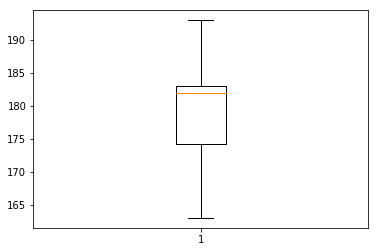

In [28]:
plt.boxplot(df.height)

In [29]:
#no outliers
df['height'].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])


0.0    163.0
0.1    170.1
0.2    173.0
0.3    175.6
0.4    178.0
0.5    182.0
0.6    183.0
0.7    183.0
0.8    185.0
0.9    188.0
1.0    193.0
Name: height, dtype: float64

In [30]:
df1=pd.read_csv('HR_attrition_rate.csv')
df1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [33]:
df1.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Departments ', 'salary'],
      dtype='object')

{'whiskers': [<matplotlib.lines.Line2D at 0xa0cc1ffda0>,
 'caps': [<matplotlib.lines.Line2D at 0xa0cc207710>,
 'boxes': [<matplotlib.lines.Line2D at 0xa0cc1ffc50>],
 'medians': [<matplotlib.lines.Line2D at 0xa0cc207da0>],
 'fliers': [<matplotlib.lines.Line2D at 0xa0cc207e80>],
 'means': []}

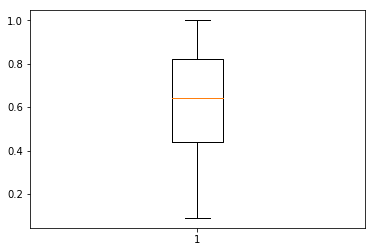

In [35]:
plt.boxplot(df1.satisfaction_level)

In [39]:
df1['satisfaction_level'].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])


0.0    0.09
0.1    0.21
0.2    0.40
0.3    0.49
0.4    0.57
0.5    0.64
0.6    0.72
0.7    0.78
0.8    0.85
0.9    0.92
1.0    1.00
Name: satisfaction_level, dtype: float64

In [54]:
#to find out layers
df3=pd.read_csv('brain_size.csv', sep=';')
df3.head()

,id,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,1,Female,133,132,124,118,64.5,816932
1,2,Male,140,150,124,.,72.5,1001121
2,3,Male,139,123,150,143,73.3,1038437
3,4,Male,133,129,128,172,68.8,965353
4,5,Female,137,132,134,147,65.0,951545


In [55]:
df3.columns

Index(['id', 'Gender', 'FSIQ', 'VIQ', 'PIQ', 'Weight', 'Height', 'MRI_Count'], dtype='object')

In [56]:
plt.boxplot(df3.FRI_Count)

AttributeError: 'DataFrame' object has no attribute 'FRI_Count'

{'whiskers': [<matplotlib.lines.Line2D at 0xa0cc2c3c88>,
 'caps': [<matplotlib.lines.Line2D at 0xa0cc2cd358>,
 'boxes': [<matplotlib.lines.Line2D at 0xa0cc2c3898>],
 'medians': [<matplotlib.lines.Line2D at 0xa0cc2cd9e8>],
 'fliers': [<matplotlib.lines.Line2D at 0xa0cc2cdd30>],
 'means': []}

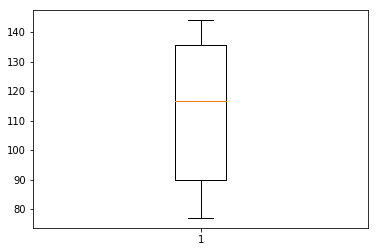

In [57]:
plt.boxplot(df3.FSIQ)

In [62]:
tf=pd.read_csv('titanic_train.csv')
tf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


{'whiskers': [<matplotlib.lines.Line2D at 0xa0d27fdd68>,
 'caps': [<matplotlib.lines.Line2D at 0xa0d240c438>,
 'boxes': [<matplotlib.lines.Line2D at 0xa0d27fd978>],
 'medians': [<matplotlib.lines.Line2D at 0xa0d240cac8>],
 'fliers': [<matplotlib.lines.Line2D at 0xa0d240ce10>],
 'means': []}

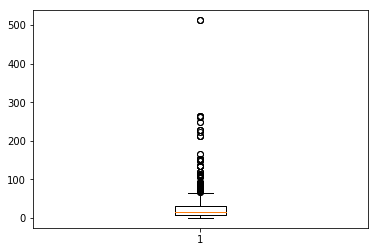

In [64]:
# to find the out laiers
plt.boxplot(tf.Fare)

In [66]:
hf=pd.read_csv('house_price_data_median.csv')
hf.head()

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1


In [67]:
hf.columns

Index(['LotArea', 'OverallQual', 'OverallCond', 'TotalBsmtSF', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageArea',
       'AboveMedianPrice'],
      dtype='object')

{'whiskers': [<matplotlib.lines.Line2D at 0xa0d29c7d30>,
 'caps': [<matplotlib.lines.Line2D at 0xa0d29d2400>,
 'boxes': [<matplotlib.lines.Line2D at 0xa0d29c7940>],
 'medians': [<matplotlib.lines.Line2D at 0xa0d29d2a90>],
 'fliers': [<matplotlib.lines.Line2D at 0xa0d29d2dd8>],
 'means': []}

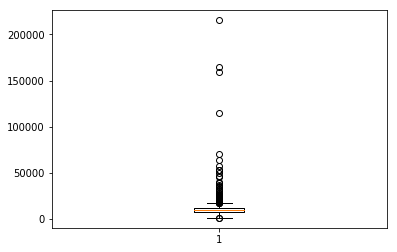

In [69]:
plt.boxplot(hf.LotArea)

In [71]:
hf['LotArea'].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])

0.0      1300.0
0.1      5000.0
0.2      7078.4
0.3      8063.7
0.4      8793.4
0.5      9478.5
0.6     10198.2
0.7     11066.5
0.8     12205.8
0.9     14381.7
1.0    215245.0
Name: LotArea, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0xa0d2a823c8>,
 'caps': [<matplotlib.lines.Line2D at 0xa0d2a82a58>,
 'boxes': [<matplotlib.lines.Line2D at 0xa0d2a77f98>],
 'medians': [<matplotlib.lines.Line2D at 0xa0d2a82e80>],
 'fliers': [<matplotlib.lines.Line2D at 0xa0d2a8c470>],
 'means': []}

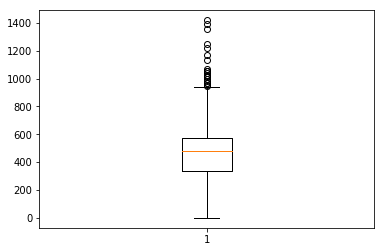

In [73]:
plt.boxplot(hf.GarageArea)

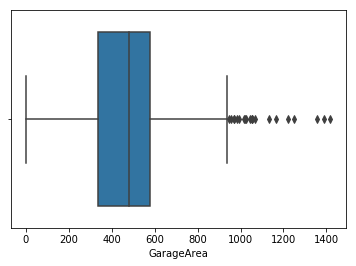

In [74]:
sms.boxplot(hf.GarageArea)

In [81]:
hf['TotalBsmtSF'].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])


0.0       0.0
0.1     636.9
0.2     755.8
0.3     840.0
0.4     910.0
0.5     991.5
0.6    1088.0
0.7    1216.0
0.8    1391.2
0.9    1602.2
1.0    6110.0
Name: TotalBsmtSF, dtype: float64

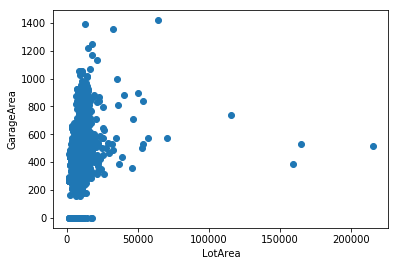

In [82]:
plt.scatter(hf.LotArea,hf.GarageArea)
plt.xlabel('LotArea')
plt.ylabel('GarageArea')
plt.show()

In [83]:
hf.columns

Index(['LotArea', 'OverallQual', 'OverallCond', 'TotalBsmtSF', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageArea',
       'AboveMedianPrice'],
      dtype='object')

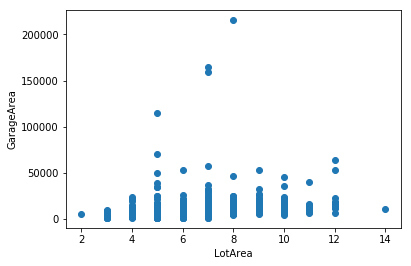

In [85]:
plt.scatter(hf.TotRmsAbvGrd,hf.LotArea)
plt.xlabel('LotArea')
plt.ylabel('GarageArea')
plt.show()

# Discore outliers with mathematical functions

Z score

In [86]:
from scipy.stats import zscore
import numpy as np

In [88]:
z=np.abs(zscore(hf))
z

array([[0.20714171, 0.65147924, 0.51719981, ..., 0.95122649, 0.35100032,
        1.00274349],
       [0.09188637, 0.07183611, 2.17962776, ..., 0.60049493, 0.06073101,
        1.00274349],
       [0.07347998, 0.65147924, 0.51719981, ..., 0.60049493, 0.63172623,
        1.00274349],
       ...,
       [0.14781027, 0.65147924, 3.07857028, ..., 2.15221636, 1.03391416,
        1.00274349],
       [0.08016039, 0.79515147, 0.38174271, ..., 0.95122649, 1.09005935,
        0.99726402],
       [0.05811155, 0.79515147, 0.38174271, ..., 0.95122649, 0.9216238 ,
        0.99726402]])

In [89]:
#looking at the out put above , its difficult to say which data point  is outlier
#Lets try to define a threshold to identify an outlier 

In [91]:
threshhold=3
print(np.where(z>3))

(array([  53,   53,   88,  144,  166,  178,  185,  185,  188,  189,  191,
        218,  224,  241,  249,  250,  291,  298,  304,  309,  313,  330,
        332,  335,  375,  375,  378,  384,  398,  440,  451,  457,  461,
        496,  508,  519,  523,  533,  570,  581,  583,  597,  605,  624,
        628,  634,  635,  635,  642,  661,  664,  676,  691,  703,  706,
        726,  745,  769,  769,  803,  825,  843,  848,  897,  897,  910,
        921,  980,  991, 1031, 1044, 1061, 1123, 1149, 1154, 1163, 1163,
       1173, 1182, 1190, 1213, 1213, 1230, 1230, 1268, 1270, 1283, 1298,
       1298, 1298, 1298, 1298, 1327, 1350, 1350, 1350, 1352, 1373, 1386,
       1396, 1435, 1450, 1457], dtype=int64), array([0, 6, 2, 6, 8, 9, 2, 7, 5, 6, 2, 2, 3, 2, 0, 2, 6, 5, 2, 8, 0, 6,
       3, 0, 1, 2, 2, 0, 2, 3, 0, 0, 2, 3, 2, 2, 3, 1, 6, 9, 2, 5, 8, 5,
       5, 6, 6, 7, 8, 0, 9, 2, 3, 2, 0, 2, 2, 0, 7, 7, 9, 6, 0, 6, 7, 7,
       5, 2, 2, 7, 3, 9, 2, 2, 5, 5, 6, 7, 3, 9, 2, 6, 5, 7, 2, 6, 5, 0,
    

In [92]:
# array 1 is holding the row number and array 2 is holding the colums 
#all the values are greater then 3
#z[row][column]
z[53][0]

3.98424384357879

In [93]:
z[1457][2]

3.0785702794481655

In [94]:
z[144][6]

3.842510049724758

In [95]:
Q1 =hf.quantile(0.25)

In [96]:
Q3 =hf.quantile(0.75)

In [97]:
IQR =Q3-Q1

In [99]:
IQR

LotArea             4048.0
OverallQual            2.0
OverallCond            1.0
TotalBsmtSF          502.5
FullBath               1.0
HalfBath               1.0
BedroomAbvGr           1.0
TotRmsAbvGrd           2.0
Fireplaces             1.0
GarageArea           241.5
AboveMedianPrice       1.0
dtype: float64

In [102]:
print(hf<(1.5 * IQR)) | (hf >(Q3 +(1.5*IQR)))

      LotArea  OverallQual  OverallCond  TotalBsmtSF  FullBath  HalfBath  \
0       False        False        False        False     False      True   
1       False        False        False        False     False      True   
2       False        False        False        False     False      True   
3       False        False        False        False      True      True   
4       False        False        False        False     False      True   
5       False        False        False        False      True      True   
6       False        False        False        False     False      True   
7       False        False        False        False     False      True   
8       False        False        False        False     False      True   
9       False        False        False        False      True      True   
10      False        False        False        False      True      True   
11      False        False        False        False     False      True   
12      Fals

TypeError: cannot compare a dtyped [bool] array with a scalar of type [NoneType]

In [103]:
# Removing the outlier
hf_new =hf[(z<3).all(axis=1)]

In [105]:
hf_new

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
5,14115,5,5,796,1,1,1,5,0,480,0
6,10084,8,5,1686,2,0,3,7,1,636,1
7,10382,7,6,1107,2,1,3,7,2,484,1
8,6120,7,5,952,2,0,2,8,2,468,0
9,7420,5,6,991,1,0,2,5,2,205,0


In [106]:
hf.shape

(1460, 11)

In [107]:
hf_new.shape

(1372, 11)

In [ ]:
#so.above code arround the 100+ row from dataset ! outlier have been reomved